#### Drone flightlogs data exploration
##### Author: Cyrus 

##### Date: 30th Sep 2022



In [31]:
import pandas as pd
import time
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [32]:
# import file 
df = pd.read_csv("/content/sample_data/2022-06-25_11-50-35_v2.csv") # droneflightlogs df 
dist_df = pd.read_csv("/content/sample_data/DJI_0010_locations.csv") # tracked location of the collared animal df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (51,52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
df.head(2)

,latitude,longitude,altitude(m),ultrasonicHeight(m),speed(mps),distance(m),max_altitude(m),max_ascent(m),max_speed(mps),max_distance(m),...,RemoteSerialNumber_legacy,BatterySerialNumber_legacy,Battery2SerialNumber,frontAvoidDist,backAvoidDist,rightAvoidDist,leftAvoidDist,upAvoidDist,downAvoidDist,isBrakingToAvoid
0,55.956102,-4.403115,0.1,0.0,0.36,265.57,0.1,0.1,0.36,265.57,...,NaN,NaN,NaN,0.0,5.3,0.0,0.0,0.0,0.0,0.0
1,55.956102,-4.403115,0.1,0.2,0.32,265.57,0.1,0.1,0.36,265.57,...,NaN,NaN,NaN,0.0,5.3,0.0,0.0,0.0,0.0,0.0


In [34]:
def distance_calculator(x1,x2,y1,y2):
    res2 = (((x1-x2)**2 + ((y1-y2)**2))**0.5)
    return res2 

In [35]:
dist_df["dist_to_center"] = distance_calculator(dist_df["X"], 1920, dist_df["Y"],1080)

In [36]:
# df.info()

In [37]:
df2 = df[["latitude","longitude","altitude(m)","speed(mps)","distance(m)","datetime(utc)","datetime(local)","max_speed(mps)"]]
df2.head(3)

,latitude,longitude,altitude(m),speed(mps),distance(m),datetime(utc),datetime(local),max_speed(mps)
0,55.956102,-4.403115,0.1,0.36,265.57,2022-06-25 10:50:35.800,2022-06-25 11:50:35.800,0.36
1,55.956102,-4.403115,0.1,0.32,265.57,2022-06-25 10:50:35.903,2022-06-25 11:50:35.903,0.36
2,55.956102,-4.403115,0.1,0.32,265.57,2022-06-25 10:50:35.905,2022-06-25 11:50:35.904,0.36


In [38]:
df2["secs"] = df["datetime(local)"].str[17:19]  
df2.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,latitude,longitude,altitude(m),speed(mps),distance(m),datetime(utc),datetime(local),max_speed(mps),secs
0,55.956102,-4.403115,0.1,0.36,265.57,2022-06-25 10:50:35.800,2022-06-25 11:50:35.800,0.36,35
1,55.956102,-4.403115,0.1,0.32,265.57,2022-06-25 10:50:35.903,2022-06-25 11:50:35.903,0.36,35


In [39]:
# print(df2.shape)

In [40]:
# convert dates object to datetime object
df2["datetime(utc)"] = pd.to_datetime(df2["datetime(utc)"],  format = "%Y-%m-%d %H:%M:%S:%f",errors='ignore')
df2["datetime(local)"] = pd.to_datetime(df2["datetime(local)"],  format="%Y-%m-%d %H:%M:%S:%f",errors='ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# filter by dates
df2 = df2[df2["datetime(local)"] >= "2022-06-25 12:03:28.000"]
df2 = df2[df2["datetime(local)"] <= "2022-06-25 12:06:33.000"]
print(df2.shape)

(3563, 9)


In [42]:
# Creat one minute frame dfs and remove duplicates based on secs column
a1 = df2[df2["datetime(local)"] < "2022-06-25 12:04:00.000"]
a2 = df2[(df2["datetime(local)"] >= "2022-06-25 12:04:00.000") & (df2["datetime(local)"] < "2022-06-25 12:05:00.000")]
a3 = df2[(df2["datetime(local)"] >= "2022-06-25 12:05:00.000") & (df2["datetime(local)"] < "2022-06-25 12:06:00.000")]
a4 = df2[df2["datetime(local)"] >= "2022-06-25 12:06:00.000"]
print(a1.shape), print(a2.shape),print(a3.shape), print(a4.shape)

(617, 9)
(1165, 9)
(1158, 9)
(623, 9)


(None, None, None, None)

In [43]:
a1 = a1.drop_duplicates(subset=["secs"])
a2 = a2.drop_duplicates(subset=["secs"])
a3 = a3.drop_duplicates(subset=["secs"])
a4 = a4.drop_duplicates(subset=["secs"])

# join the data frames 
frames = [a1, a2, a3, a4]
# concatenate dataframes
df2 = pd.concat(frames)

In [44]:
print(df2.shape)

(185, 9)


In [45]:
pd.set_option("display.max_rows", None)
df2.head(2)

,latitude,longitude,altitude(m),speed(mps),distance(m),datetime(utc),datetime(local),max_speed(mps),secs
14888,55.956228,-4.402707,79.9,0.0,2.86,2022-06-25 11:03:28.016,2022-06-25 12:03:28.015,12.5,28
14908,55.956228,-4.402708,79.8,0.0,2.80,2022-06-25 11:03:29.015,2022-06-25 12:03:29.015,12.5,29


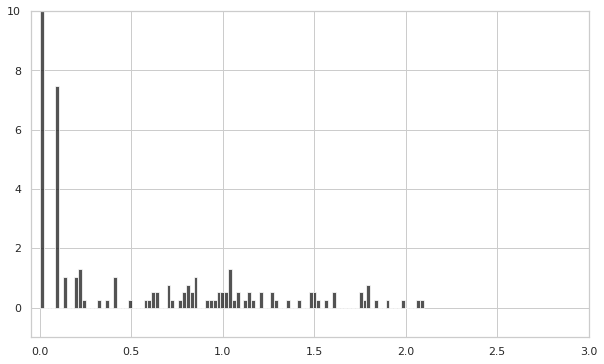

In [46]:
# speed distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.hist(df2["speed(mps)"], 100, density=True, facecolor='k', alpha=0.75)
plt.ylim(-1,10)
plt.xlim(-0.05,3)
plt.show()


In [47]:
dist_df.head(4)

,Track no,Slice no,X,Y,Distance,Velocity,Pixel Value,dist_to_center
0,1,1,1923,1078,-1.000,-1.000,4142388,3.605551
1,1,2,1920,1075,0.547,0.003,11047573,5.000000
2,1,3,1920,1075,0.000,0.000,2958886,5.000000
3,1,4,1920,1075,0.000,0.000,2633013,5.000000


In [48]:
# Select every 29th row of the distance to the center df
df_distance = dist_df[::29]

In [49]:
print(df2.shape), print(df_distance.shape)

(185, 9)
(186, 8)


(None, None)

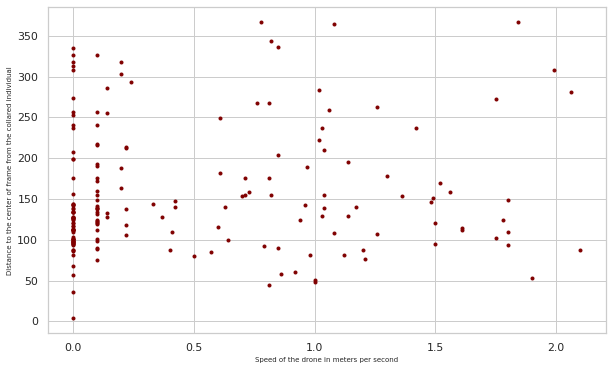

In [50]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.scatter(y =df_distance["dist_to_center"].head(185).copy(), 
            x = df2["speed(mps)"].head(185).copy(), color ="maroon", marker =".")
plt.xlabel("Speed of the drone in meters per second", size =7)
plt.ylabel("Distance to the center of frame from the collared individual", size =7)
plt.savefig("dronespeed_dist_to_centre_plot.png", dpi=300, bbox_inches = "tight", width=5, height = 3)
plt.show()